In [2]:
from testsCBS import test_cbs_on_map

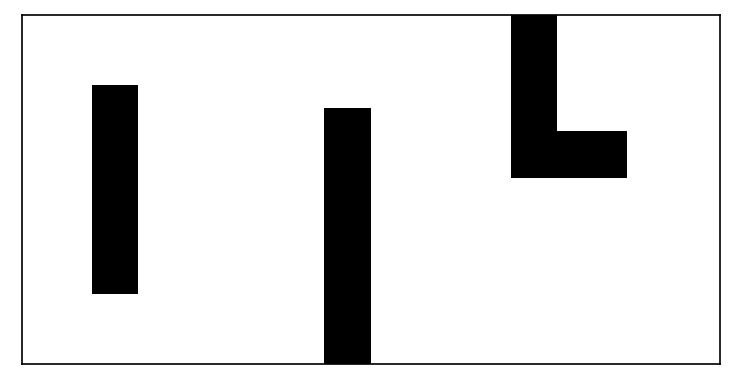

[0 0 0, 1 0 1, 1 1 2, 2 1 3, 2 2 4]


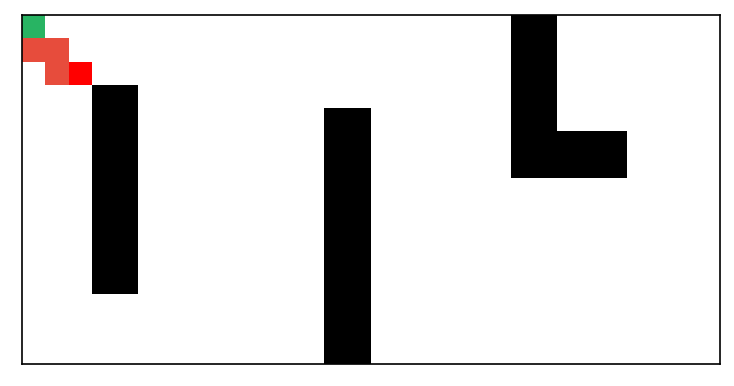

[0 1 0, 0 0 1]


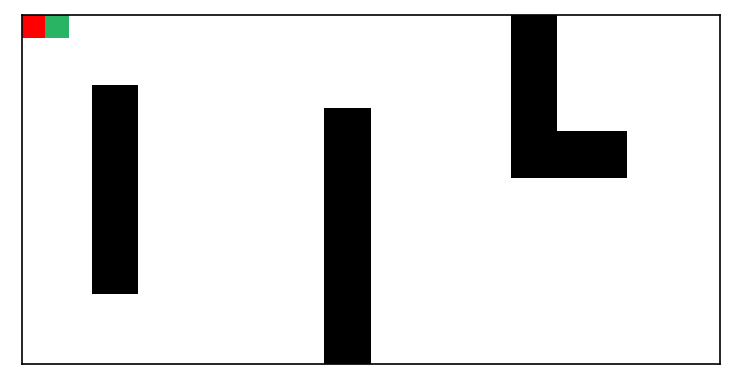

[1 0 0, 1 1 1, 1 2 2, 1 3 3]


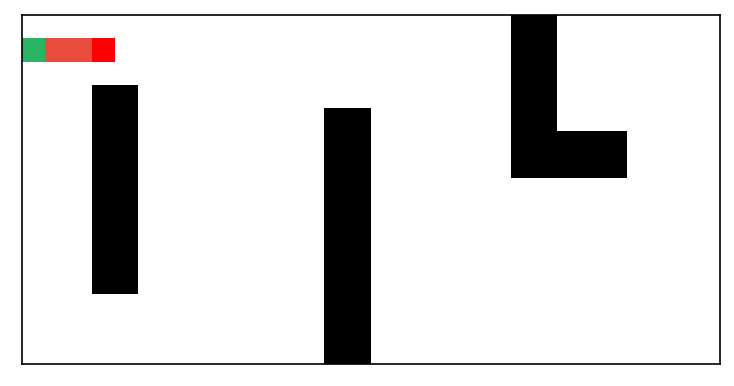

[1 1 0, 1 2 1, 1 3 2, 1 4 3, 1 5 4, 1 6 5, 1 7 6, 1 8 7, 2 8 8, 3 8 9, 4 8 10, 5 8 11, 5 9 12, 5 10 13, 6 10 14, 7 10 15, 8 10 16, 9 10 17, 10 10 18]


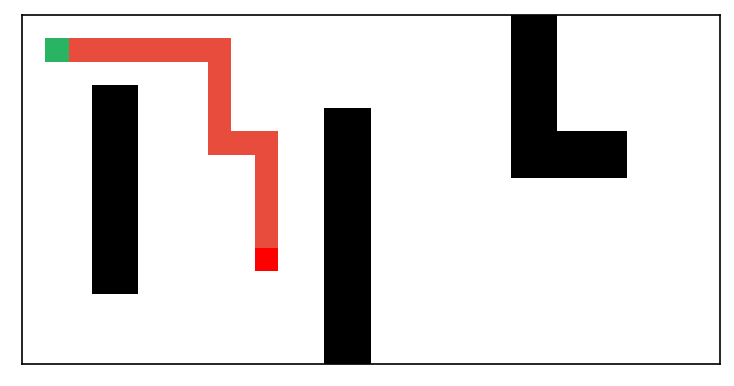

[0 0 0, 1 0 1, 1 1 2, 2 1 3, 2 2 4]
[0 1 0, 0 0 1]
[1 0 0, 1 1 1, 1 2 2, 1 3 3]
[1 1 0, 1 2 1, 1 3 2, 1 4 3, 1 5 4, 1 6 5, 1 7 6, 1 8 7, 2 8 8, 3 8 9, 4 8 10, 5 8 11, 5 9 12, 5 10 13, 6 10 14, 7 10 15, 8 10 16, 9 10 17, 10 10 18]


In [5]:
test_cbs_on_map(0, 4)